In [3]:
import numpy as np
import pandas as pd
import glob
import os

from scipy.io import loadmat
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pal = {'wingHz': '#231f20', 'rightHalHz':  '#33ade3' , 'leftHalHz': '#ed1c24'}

boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
# Note that you can change the order of hue variables here.
kwargs = {'palette': pal, 'hue_order': ['wingHz', 'rightHalHz', 'leftHalHz']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7},
                        **kwargs)

## loaded haltere

In [3]:
direc = r"../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5/"

In [4]:
files = glob.glob(direc + '*.mat')

In [5]:
files

['../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly1.mat',
 '../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly2.mat',
 '../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly3.mat',
 '../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly4.mat',
 '../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly5.mat',
 '../Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly8.mat']

In [9]:
data = loadmat(files[0])

In [6]:
df = pd.DataFrame(columns = ['flyID', 'wingHz', 'leftHalHz' , 'rightHalHz', 'treatment'], 
                  index = np.arange(len(files)*5))

In [10]:
trt = [k for k in data.keys() if 'haltere' in k or 'load' in k]
trt
ii = 0
for f in files:
    flynum = os.path.basename(f)[-8:-4]
    data = loadmat(f)
    for t in trt:
        
        m = np.nanmean(data[t].T, axis = 1)
        w = m[0]
        lh = m[1]
        rh = m[2]
        
        df.loc[ii, 'flyID'] = flynum
        df.loc[ii, 'treatment'] = t
        df.loc[ii, 'wingHz'] = w
        df.loc[ii, 'leftHalHz'] = lh
        df.loc[ii, 'rightHalHz'] = rh
        ii+=1

In [11]:
df.to_csv(direc + 'compiledDataForAggregratePlots.csv')

In [12]:
seaborn_long = pd.melt(df, id_vars=['flyID', 'treatment'],
       var_name= 'BodyPart',
       value_name= 'Frequency')

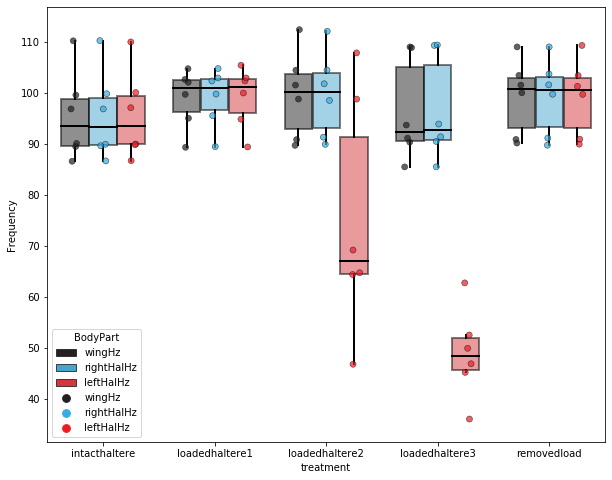

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'treatment', y = 'Frequency', hue = 'BodyPart', data = seaborn_long,
           order = ['intacthaltere', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload'],
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax, x = 'treatment', y = 'Frequency', hue = 'BodyPart', data = seaborn_long,
              order = ['intacthaltere', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload'],
              dodge=True, **stripplot_kwargs)
plt.savefig('./SampleSizeAndStats/Summary-LoadedHaltere_Fig5.pdf')

## EpiRidge Cut

In [7]:
direc= r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3/"

In [8]:
files_Hz = glob.glob(direc + "*wingbeat*.mat")
files_length = glob.glob(direc + '*winglength*.mat')

In [9]:
files_Hz

['./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly1.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly2.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly3.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly5.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly6.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly7.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\singlewingbeat_fly9.mat']

In [10]:
files_length

['./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly1_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly2_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly3_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly5_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly6_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly7_winglength_norm.mat',
 './dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3\\fly9_winglength_norm.mat']

In [11]:
df = pd.DataFrame(index = np.arange(len(files_Hz)*5), 
                  columns = ['flyID', 'treatment', 'winglength', 'wingHz', 'leftHalHz', 'rightHalHz'])

ii = 0       
# not including fly9
for f in files_Hz[:-1]:
    flynum = os.path.basename(f)[-8:-4]
    print(flynum)
    length = [f for f in files_length if flynum in f][0]
    length_data = loadmat(length)
    string = flynum + '_winglength_norm'
    
    l = length_data[string].T[0]
    new_l = np.round(np.concatenate((l[1:], l[0]), axis = None),2)
                  
    data = loadmat(f)
                  
    trt = [k for k in sorted(data.keys()) if 'wing' in k]
    
    for t, wl in zip(trt, new_l):
                  print(t + '-' + str(wl))
                  df.loc[ii, 'flyID'] = flynum
                  df.loc[ii, 'treatment'] = t
                  df.loc[ii, 'winglength'] = wl
                  
                  w = data[t].T[0]
                  lh = data[t].T[1]
                  rh = data[t].T[2]
                  df.loc[ii, 'wingHz'] = np.nanmean(w)
                  df.loc[ii, 'leftHalHz'] = np.nanmean(lh)
                  df.loc[ii, 'rightHalHz'] = np.nanmean(rh)
                  ii+=1

fly1
cutwing1_1-0.82
cutwing2_1-0.72
cutwing3_1-0.58
cutwing4_1-0.5
cutwing5_1-0.38
intactwings_1-1.0
fly2
cutwing1_1-0.74
cutwing2_1-0.62
cutwing3_1-0.53
cutwing4_1-0.49
cutwing5_1-0.37
intactwings_3-1.0
fly3
cutwing1_1-0.82
cutwing2_1-0.65
cutwing3_1-0.55
cutwing4_1-0.44
cutwing5_1-0.35
intactwings_1-1.0
fly5
cutwing1_1-0.79
cutwing2_1-0.63
cutwing3_1-0.55
cutwing4_1-0.42
intactwings_3-1.0
fly6
cutwing1_1-0.77
cutwing2_2-0.64
cutwing3_1-0.51
cutwing4_1-0.38
intactwings_1-1.0
fly7
cutwing1_1-0.76
cutwing2_1-0.61
cutwing3_1-0.49
cutwing4_1-0.38
intactwings_2-1.0


In [12]:
bins = [0.3, 0.4, 0.5, 0.6, 0.7 ,0.9, 1]
df['binned'] = pd.cut(df['winglength'], bins)
# new_df = df.drop(['winglength'], axis=1)

In [15]:
# new_df.to_csv(direc + 'compiledDataForAggregratePlots.csv')
df.to_csv(direc + 'compiledDataForAggregratePlots.csv')

In [76]:
seaborn_long = pd.melt(new_df, id_vars=['flyID', 'treatment', 'binned'],
       var_name= 'BodyPart',
       value_name= 'Frequency')

seaborn_long

,flyID,treatment,binned,BodyPart,Frequency
0,fly1,cutwing1_1,"(0.7, 0.9]",wingHz,138.095
1,fly1,cutwing2_1,"(0.7, 0.9]",wingHz,132.321
2,fly1,cutwing3_1,"(0.5, 0.6]",wingHz,151.648
3,fly1,cutwing4_1,"(0.4, 0.5]",wingHz,138.387
4,fly1,cutwing5_1,"(0.3, 0.4]",wingHz,187.273
...,...,...,...,...,...
100,fly7,cutwing3_1,"(0.4, 0.5]",rightHalHz,108.655
101,fly7,cutwing4_1,"(0.3, 0.4]",rightHalHz,104.11
102,fly7,intactwings_2,"(0.9, 1.0]",rightHalHz,121.732
103,NaN,NaN,NaN,rightHalHz,NaN


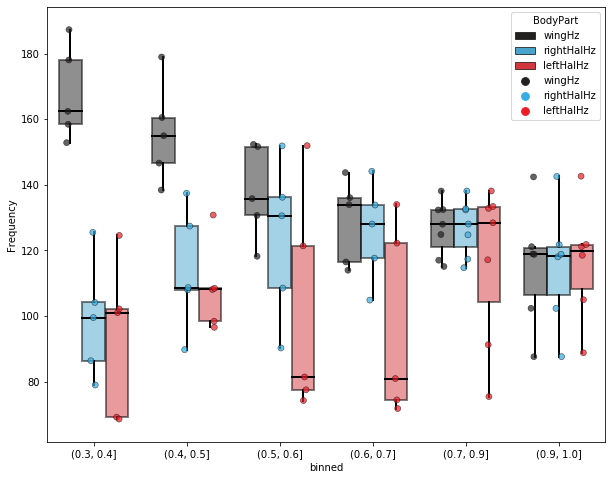

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'binned', y = 'Frequency', hue = 'BodyPart', data = seaborn_long,
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax, x = 'binned', y = 'Frequency', hue = 'BodyPart', data = seaborn_long,
              dodge=True, **stripplot_kwargs)

plt.savefig('./SampleSizeAndStats/Summary-EpiRidgeCut_Fig3.pdf')

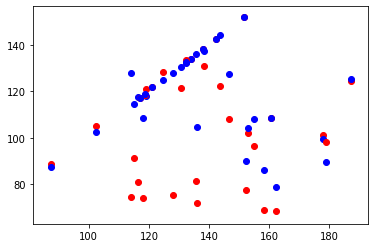

In [84]:
for fly, df in seaborn_long.groupby('flyID'):
#     print(df)
    w = df[df.BodyPart == 'wingHz'].Frequency
    lh = df[df.BodyPart == 'leftHalHz'].Frequency
    rh = df[df.BodyPart == 'rightHalHz'].Frequency
    
    plt.scatter(w, lh, c = 'r')
    plt.scatter(w, rh, c = 'b')

## Slit Sc

In [85]:
direc = r"../Submission 3/Final Submission/Data to be uploaded to Dryad/Figure2/"

In [86]:
file = pd.read_csv(direc + 'merged_TD', sep = "\t")

In [87]:
data = file.loc[:,('Treatment', 'Fly', 'wing_mean.Corleft', 'Average.Corleft', 'Average.Corright')]

In [88]:
data.columns = ['treatment', 'flyID', 'winglength', 'ClippedWingHz', 'IntactWingHz']

bins = [0.3, 0.5, 0.6, 0.7 ,0.9, 1]
data['binned'] = pd.cut(data['winglength'], bins)
new_df = data.drop(['winglength'], axis=1)

In [89]:
new_df.to_csv(r"../Submission 3/Final Submission/Data to be uploaded to Dryad/Figure2/compiledDataForAggregratePlots.csv")

In [90]:
seaborn_long = pd.melt(new_df, id_vars=['flyID', 'treatment', 'binned'],
       var_name= 'Wing',
       value_name= 'Frequency')
seaborn_long

,flyID,treatment,binned,Wing,Frequency
0,Fly1,Intact,"(0.7, 0.9]",ClippedWingHz,93.154528
1,Fly1,Intact,"(0.6, 0.7]",ClippedWingHz,101.806114
2,Fly1,Intact,"(0.5, 0.6]",ClippedWingHz,108.858352
3,Fly1,Intact,"(0.3, 0.5]",ClippedWingHz,93.192249
4,Fly1,Intact,"(0.3, 0.5]",ClippedWingHz,84.506527
...,...,...,...,...,...
103,Fly9,Slit,"(0.7, 0.9]",IntactWingHz,105.300000
104,Fly9,Slit,"(0.6, 0.7]",IntactWingHz,77.920000
105,Fly9,Slit,"(0.5, 0.6]",IntactWingHz,84.210000
106,Fly9,Slit,"(0.3, 0.5]",IntactWingHz,80.700000


In [91]:
pal = {'IntactWingHz': '#231f20', 'ClippedWingHz': '#ed1c24'}

boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
# Note that you can change the order of hue variables here.
kwargs = {'palette': pal, 'hue_order': ['Intact', 'Slit']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7},
                        **kwargs)

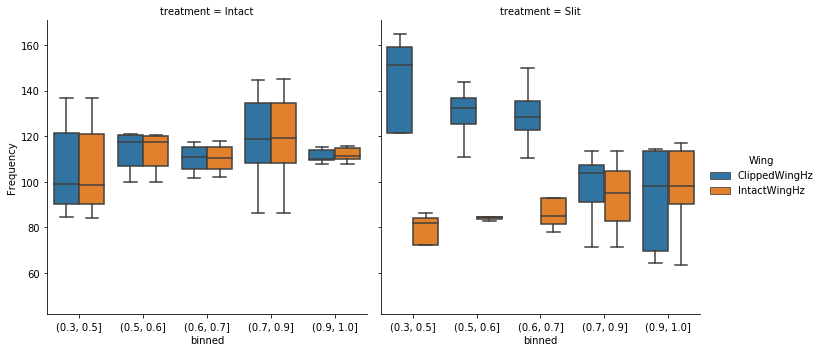

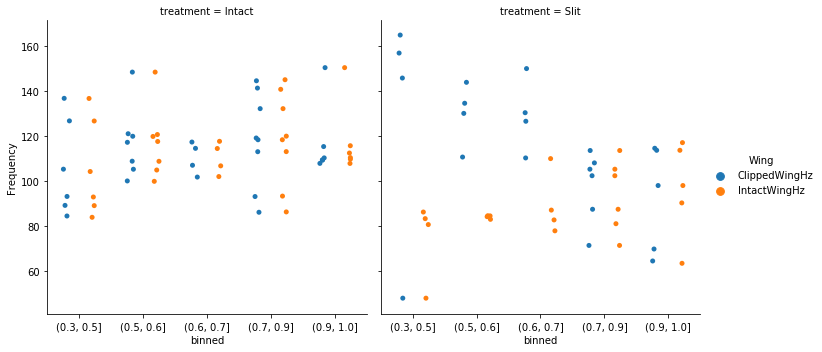

In [92]:
# fig, ax = plt.subplots(1,2, figsize=(10,8))
# ax = ax.ravel()
f1 = sns.catplot(x = 'binned', y = 'Frequency', hue = 'Wing', col='treatment',
            data = seaborn_long, kind = 'box',
           fliersize=0)
plt.savefig('./SampleSizeAndStats/Summary-SlitSc-Fig2-boxplots.pdf')

f2 = sns.catplot(x = 'binned', y = 'Frequency', hue = 'Wing', col='treatment',
            data = seaborn_long, kind = 'strip',
           dodge = True)

plt.savefig('./SampleSizeAndStats/Summary-SlitSc-Fig2-dots.pdf')

In [22]:
from scipy.io import loadmat
# direc = r"../Submission 2/Data to be uploaded to Dryad/delFreq_Figure4/"
data = loadmat(r"../Submission 2/Data to be uploaded to Dryad/delFreq_Figure4/delFreqWithoutLength/.mat")

FileNotFoundError: [Errno 2] No such file or directory: '../Submission 2/Data to be uploaded to Dryad/delFreq_Figure4/delFreqWithoutLength\\.mat'

In [19]:
df = pd.DataFrame(data = None, column = ['treatment', 'frequencyDiff']
for test in data['bothHaltereAblated'][0]:
    delta = test[0] - test[-1:]

In [21]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 21 12:12:42 2014',
 '__version__': '1.0',
 '__globals__': [],
 'bothHaltereAblated': array([[array([[105.2631579 ,   1.        ],
        [111.1111111 ,   0.76269945],
        [142.8571429 ,   0.61769684],
        [166.6666667 ,   0.46432117],
        [200.        ,   0.38906248]]),
         array([[117.6470588 ,   1.        ],
        [125.        ,   0.79533641],
        [142.8571429 ,   0.70859711],
        [166.6666667 ,   0.59416696],
        [181.8181818 ,   0.53296655],
        [200.        ,   0.44989442]]),
         array([[111.1111111 ,   1.        ],
        [129.16666665,   0.79689103],
        [142.8571429 ,   0.65411109],
        [160.25641025,   0.54308654],
        [181.8181818 ,   0.45626714],
        [200.        ,   0.41207984]]),
         array([[117.6470588 ,   1.        ],
        [125.        ,   0.76363594],
        [153.8461538 ,   0.63415625],
        [166.6666667 ,   0.52538917],
   